# Calculate duplicates

In [ ]:
-- based on certain columns
WITH temp1 AS (
  SELECT 'Jack' name, 17 age, 2 siblings_number
  union all
  select 'John' name, 17 age, 3 siblings_number
  union all
  select 'Jack' name, 17 age, 2 siblings_number
)
select 
  name, 
  age,
  COUNT(*)
FROM temp1
GROUP BY 1, 2
HAVING COUNT(*) > 1

In [ ]:
-- Count how many full-row duplicates there are
WITH temp1 AS (
  SELECT 'Jack' name, 17 age, 2 siblings_number
  union all
  select 'John' name, 17 age, 3 siblings_number
  union all
  select 'Jack' name, 17 age, 2 siblings_number
),
temp1_distinct AS (
  SELECT DISTINCT(name, age, siblings_number)
  FROM temp1
)
SELECT 
  (SELECT COUNT(*) FROM temp1) AS total_row_count,
  (SELECT COUNT(*) FROM temp1_distinct) AS distinct_row_count,
  (SELECT COUNT(*) FROM temp1) - (SELECT COUNT(*) FROM temp1_distinct) AS number_duplicated_rows


-- Filter out rows that are duplicates based on all columns
WITH temp1 AS (
  SELECT 'Jack' name, 17 age, 2 siblings_number
  union all
  select 'John' name, 17 age, 3 siblings_number
  union all
  select 'Jack' name, 17 age, 2 siblings_number
)
select 
  name, 
  age,
  siblings_number,
  count(*)
from temp1
group by 1,2,3
having count(*) > 1

# UNNEST nested columns

From the table `bigquery-public-data.ga4_obfuscated_sample_ecommerce.events_20210131`:

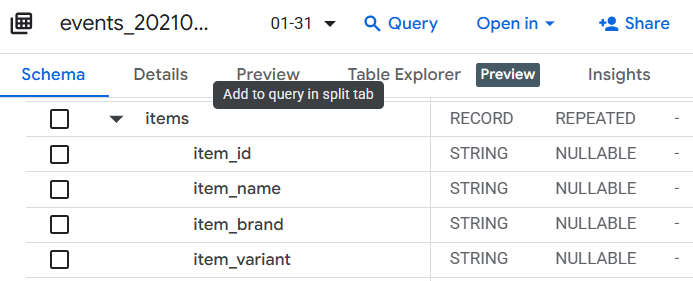

With the query below, you can get a result like this: 

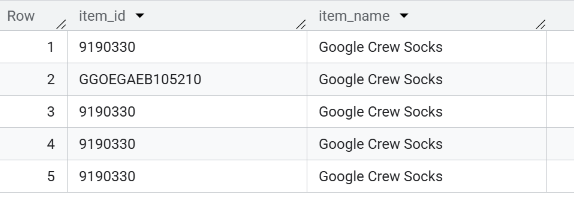

In [ ]:
SELECT 
  -- items
  items.item_id AS item_id,
  items.item_name AS item_name
FROM 
  `bigquery-public-data.ga4_obfuscated_sample_ecommerce.events_20210131`,
  UNNEST(items) AS items
WHERE 
  items.item_name = 'Google Crew Socks'
LIMIT 5
